화면분할 control+ chift + (-)

활성화: source upgrade_v/bin/activate

비활성화: deactivate

In [14]:
# !pip install numpy matplotlib opencv-python scikit-learn


# OpenCV 이미지 처리 기초 튜토리얼

이 노트북에서는 OpenCV를 사용한 기본적인 이미지 처리 방법들을 배워보겠습니다.


In [17]:

## 1. 필요한 라이브러리 및 모듈 설치와 가져오기

# 먼저 필요한 패키지들을 설치해주세요 (터미널에서 실행)
# pip install opencv-python
# pip install matplotlib
# pip install numpy  
# pip install scikit-learn

# 라이브러리 불러오기
import numpy as np              # 수치 연산용 라이브러리 (배열, 행렬 연산)
import matplotlib.pyplot as plt # 그래프와 이미지 시각화용 라이브러리
import cv2                      # OpenCV - 이미지 처리용 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할용 함수
from collections import Counter # 데이터 개수 세기용 클래스

# 한글 폰트 설정 (matplotlib에서 한글 표시를 위해 필요)
plt.rc('font', family='AppleGothic')

# OpenCV 버전 확인
print(f"OpenCV 버전: {cv2.__version__}")


OpenCV 버전: 4.12.0


이미지 크기: (3, 3, 3)
데이터 타입: uint8


/Users/iseungjun/Desktop/Code/Python/upgrade_v/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


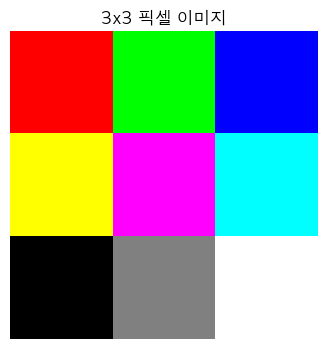

좌상단 픽셀 (빨강): [255   0   0]
중앙 픽셀 (마젠타): [255   0 255]


In [18]:

## 2. 기본 이미지 생성 및 픽셀 이해

### 2.1 간단한 3x3 픽셀 이미지 만들기


# 3x3 크기의 작은 컬러 이미지 생성
# 각 픽셀은 [B, G, R] 형태의 색상값을 가집니다 (0~255 범위)
simple_image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],      # 첫 번째 행: 빨강, 초록, 파랑
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]], # 두 번째 행: 노랑, 마젠타, 시안
    [[0, 0, 0], [128, 128, 128], [255, 255, 255]]  # 세 번째 행: 검정, 회색, 흰색
], dtype=np.uint8)  # 픽셀값은 0~255 범위의 정수형

print(f"이미지 크기: {simple_image.shape}")  # (높이, 너비, 채널수)
print(f"데이터 타입: {simple_image.dtype}")

# 이미지 시각화
plt.figure(figsize=(8, 4))
plt.imshow(simple_image)
plt.title('3x3 픽셀 이미지')
plt.axis('off')  # 축 표시 제거
plt.show()

# 특정 픽셀의 RGB 값 확인
print(f"좌상단 픽셀 (빨강): {simple_image[0, 0]}")
print(f"중앙 픽셀 (마젠타): {simple_image[1, 1]}")


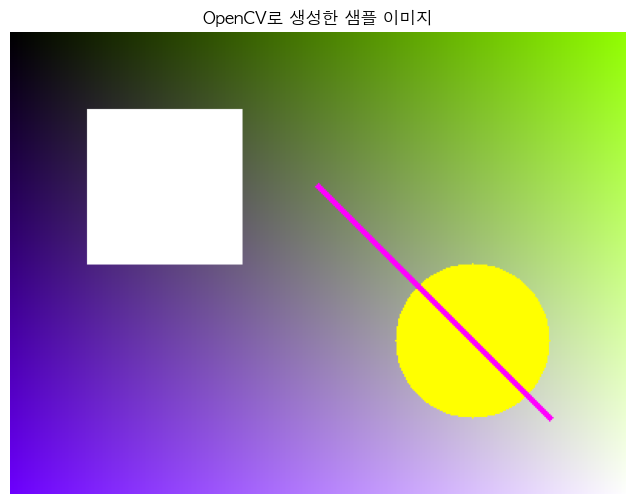

샘플 이미지 크기: (300, 400, 3)


In [20]:
### 2.2 이미지의 구조 이해

# 실제 크기의 샘플 이미지 생성 함수
def create_sample_image():
    """테스트용 샘플 이미지 생성 함수"""
    height, width = 300, 400  # 높이 300픽셀, 너비 400픽셀
    image = np.zeros((height, width, 3), dtype=np.uint8)  # 빈 검은색 이미지 생성
    
    # 그라디언트 배경 효과 만들기
    for i in range(height):
        for j in range(width):
            # 위치에 따라 색상이 변하는 그라디언트 효과
            image[i, j] = [i*255//height, j*255//width, (i+j)*255//(height+width)]
    
    # 다양한 도형들 추가
    cv2.rectangle(image, (50, 50), (150, 150), (255, 255, 255), -1)  # 흰색 사각형
    cv2.circle(image, (300, 200), 50, (0, 255, 255), -1)             # 노란색 원
    cv2.line(image, (200, 100), (350, 250), (255, 0, 255), 3)        # 마젠타색 선
    
    return image

# 샘플 이미지 생성 및 표시
sample = create_sample_image()
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환하여 표시
plt.title('OpenCV로 생성한 샘플 이미지')
plt.axis('off')
plt.show()

print(f"샘플 이미지 크기: {sample.shape}")


원본 크기: (300, 400, 3)


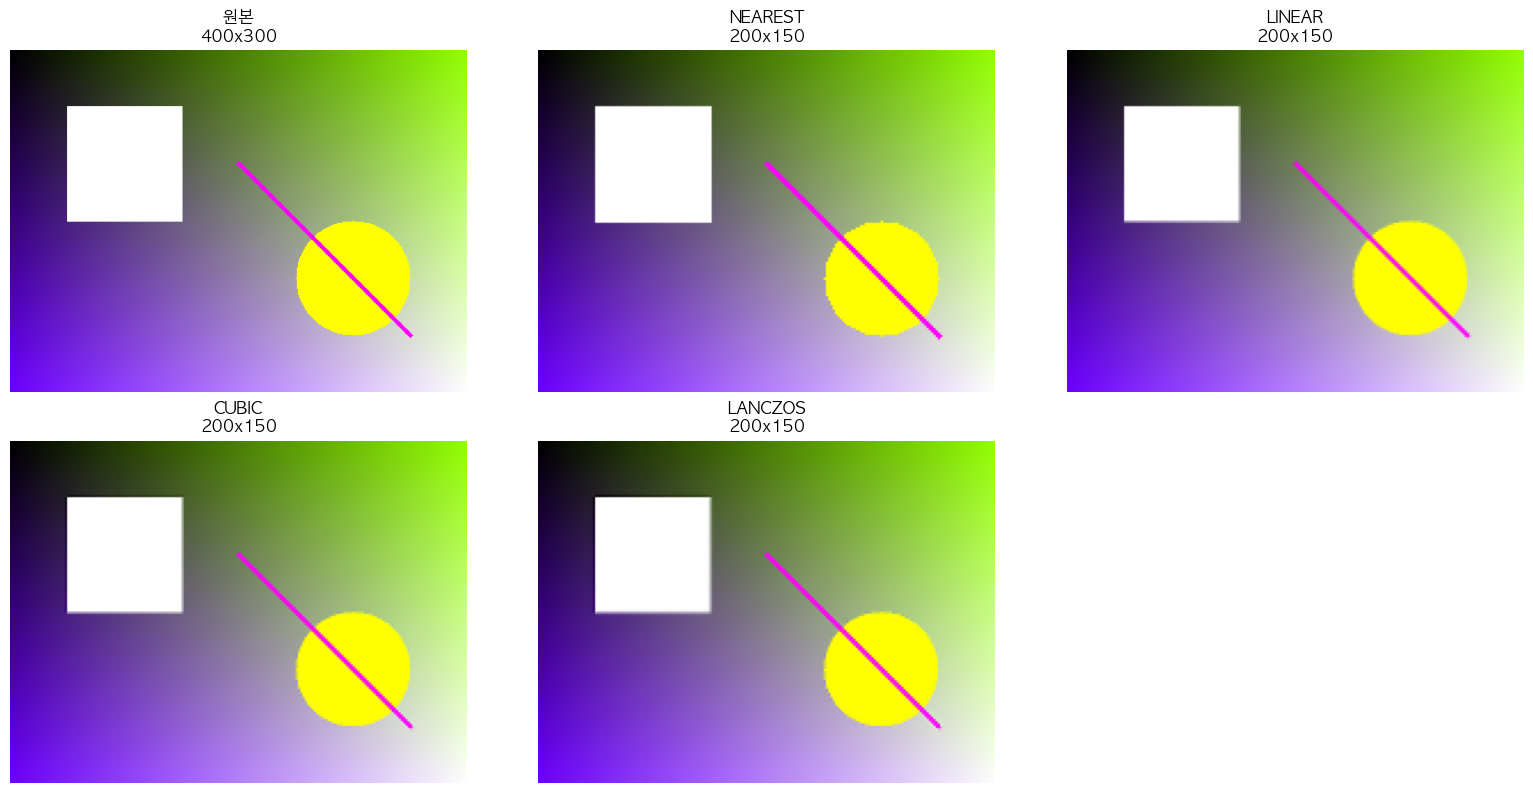

In [21]:
## 3. 이미지 크기 조정 (Resize)

### 3.1 기본 크기 조정


def demonstrate_resize_methods():
    """다양한 이미지 크기 조정 방법 시연"""
    
    original = create_sample_image()
    print(f"원본 크기: {original.shape}")
    
    # 다양한 보간법(interpolation) 비교
    # 보간법: 이미지 크기 변경 시 새로운 픽셀값을 계산하는 방법
    interpolations = {
        'NEAREST': cv2.INTER_NEAREST,    # 최근접 이웃 (가장 빠르지만 품질 낮음)
        'LINEAR': cv2.INTER_LINEAR,      # 선형 보간 (기본값, 속도와 품질의 균형)
        'CUBIC': cv2.INTER_CUBIC,        # 3차 보간 (고품질, 느림)
        'LANCZOS': cv2.INTER_LANCZOS4    # Lanczos 보간 (최고 품질, 가장 느림)
    }
    
    target_size = (200, 150)  # 새로운 크기 (너비, 높이)
    
    plt.figure(figsize=(16, 8))
    
    # 원본 이미지 표시
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f'원본\n{original.shape[1]}x{original.shape[0]}')
    plt.axis('off')
    
    # 각 보간법별 결과 비교
    for i, (name, method) in enumerate(interpolations.items()):
        resized = cv2.resize(original, target_size, interpolation=method)
        
        plt.subplot(2, 3, i+2)
        plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
        plt.title(f'{name}\n{target_size[0]}x{target_size[1]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 함수 실행
demonstrate_resize_methods()


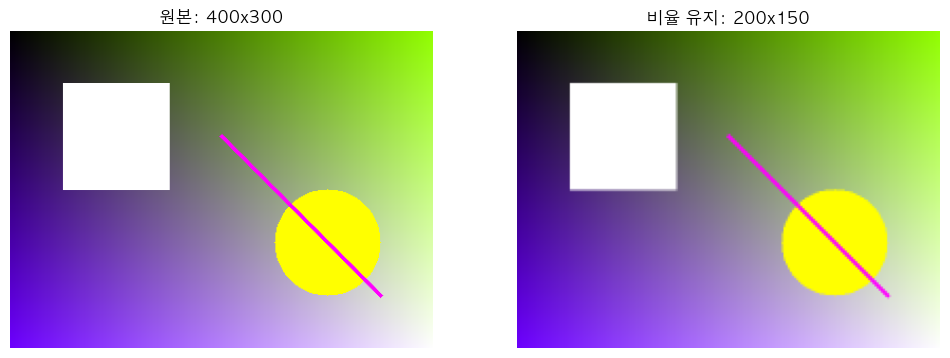

In [22]:
### 3.2 비율 유지하며 크기 조정


def resize_keep_ratio(image, max_size=300):
    """비율을 유지하면서 최대 크기 제한"""
    height, width = image.shape[:2]  # 높이와 너비 추출
    
    # 더 긴 쪽을 기준으로 비율 계산
    if max(height, width) > max_size:
        if height > width:
            # 높이가 더 클 때
            new_height = max_size
            new_width = int(width * max_size / height)  # 비율에 맞춰 너비 계산
        else:
            # 너비가 더 클 때
            new_width = max_size
            new_height = int(height * max_size / width)  # 비율에 맞춰 높이 계산
    else:
        # 원본이 이미 작으면 그대로 유지
        new_height, new_width = height, width
    
    resized = cv2.resize(image, (new_width, new_height))
    return resized

# 실습 예제
original = create_sample_image()
resized_ratio = resize_keep_ratio(original, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title(f'원본: {original.shape[1]}x{original.shape[0]}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_ratio, cv2.COLOR_BGR2RGB))
plt.title(f'비율 유지: {resized_ratio.shape[1]}x{resized_ratio.shape[0]}')
plt.axis('off')
plt.show()



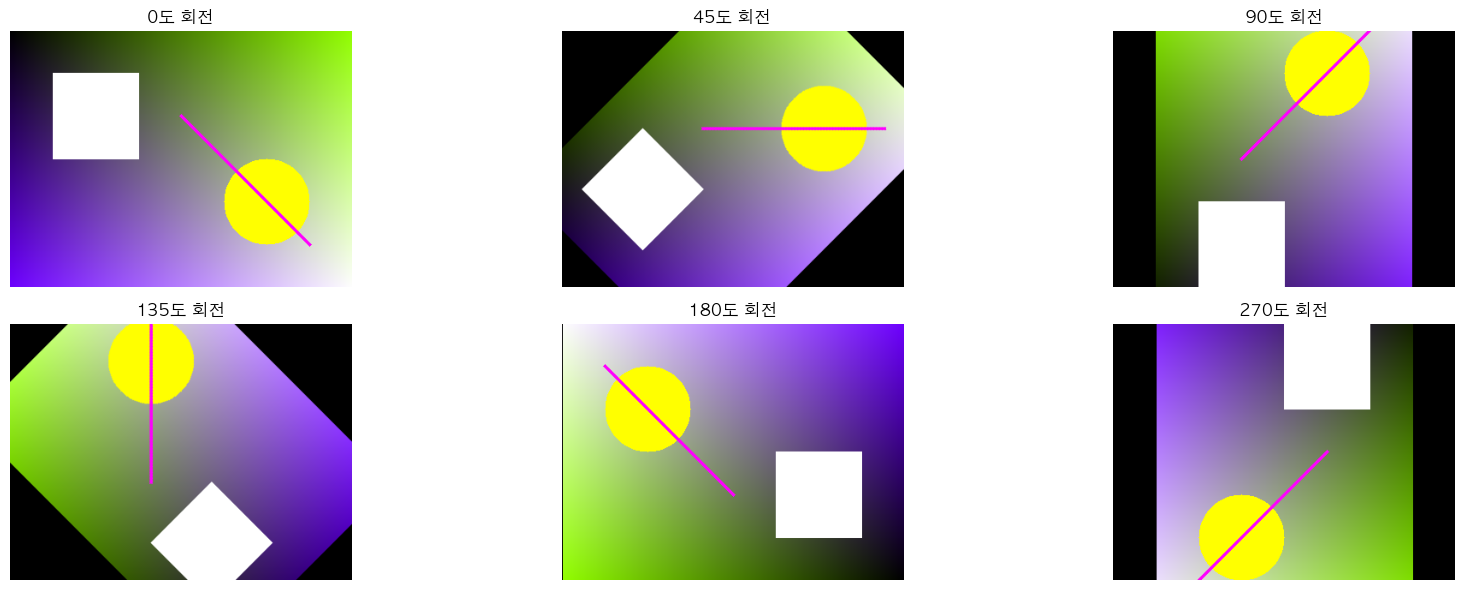

In [23]:
## 4. 이미지 회전 (Rotation)

### 4.1 기본 회전

def rotate_image_examples():
    """이미지 회전 예제들"""
    
    original = create_sample_image()
    height, width = original.shape[:2]
    center = (width // 2, height // 2)  # 이미지 중심점 계산
    
    # 다양한 각도로 회전
    angles = [0, 45, 90, 135, 180, 270]
    
    plt.figure(figsize=(18, 6))
    
    for i, angle in enumerate(angles):
        # 회전 변환 행렬 생성
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        # 매개변수: (중심점, 각도, 확대/축소 비율)
        
        # 이미지 회전 적용
        rotated = cv2.warpAffine(original, rotation_matrix, (width, height))
        # 매개변수: (원본이미지, 변환행렬, 결과이미지크기)
        
        plt.subplot(2, 3, i+1)
        plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
        plt.title(f'{angle}도 회전')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 함수 실행
rotate_image_examples()



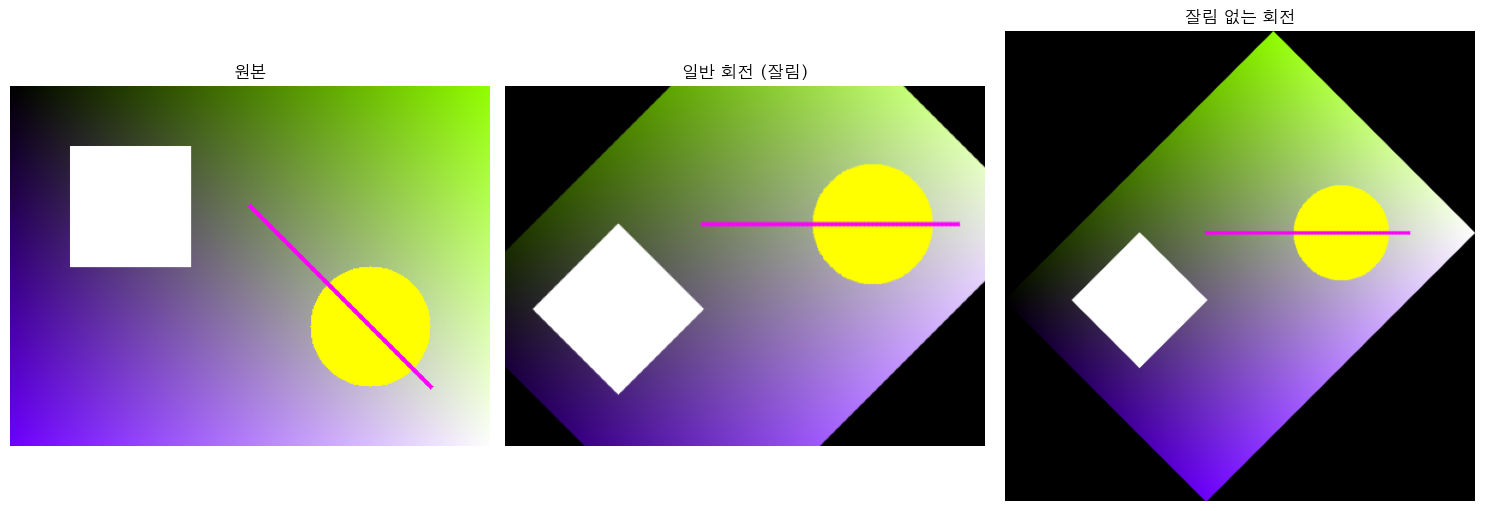

In [24]:
### 4.2 잘림 없는 회전


def rotate_without_crop(image, angle):
    """이미지 잘림 없이 회전하는 함수"""
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    
    # 회전 변환 행렬 계산
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # 회전된 이미지의 새로운 경계 계산 (삼각함수 이용)
    cos_val = np.abs(rotation_matrix[0, 0])  # cosine 값
    sin_val = np.abs(rotation_matrix[0, 1])  # sine 값
    
    # 회전 후 필요한 새로운 이미지 크기 계산
    new_width = int((height * sin_val) + (width * cos_val))
    new_height = int((height * cos_val) + (width * sin_val))
    
    # 회전 중심점을 새로운 이미지 중심으로 이동
    rotation_matrix[0, 2] += (new_width / 2) - center[0]   # x축 이동
    rotation_matrix[1, 2] += (new_height / 2) - center[1]  # y축 이동
    
    # 회전 적용
    rotated = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))
    
    return rotated

# 비교 예제
original = create_sample_image()
angle = 45

# 일반 회전 (잘림 발생)
normal_rotated = cv2.warpAffine(
    original, 
    cv2.getRotationMatrix2D((original.shape[1]//2, original.shape[0]//2), angle, 1.0),
    (original.shape[1], original.shape[0])
)

# 잘림 없는 회전
no_crop_rotated = rotate_without_crop(original, angle)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('원본')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(normal_rotated, cv2.COLOR_BGR2RGB))
plt.title('일반 회전 (잘림)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(no_crop_rotated, cv2.COLOR_BGR2RGB))
plt.title('잘림 없는 회전')
plt.axis('off')

plt.tight_layout()


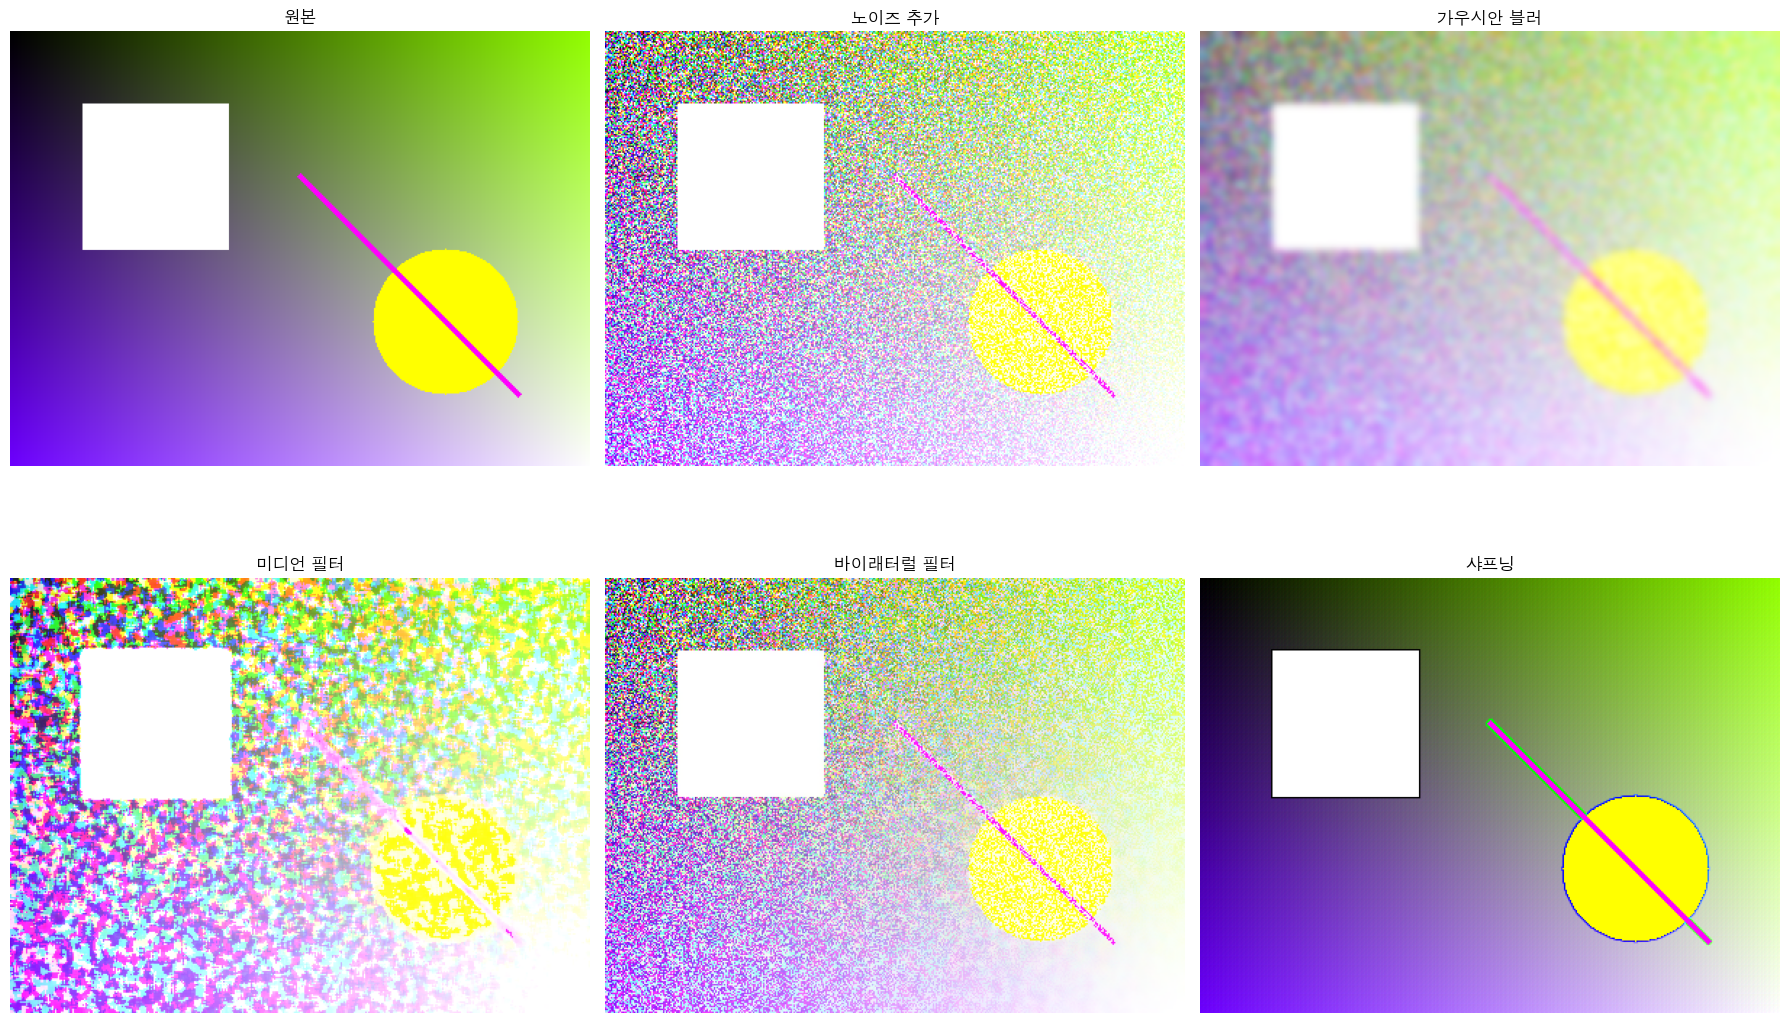

In [25]:
## 5. 이미지 필터링

### 5.1 기본 필터들

def demonstrate_filters():
    """다양한 필터 효과 시연"""
    
    original = create_sample_image()
    noisy = original.copy()
    
    # 가우시안 노이즈 추가 (실제 이미지에서 발생하는 노이즈 시뮬레이션)
    noise = np.random.normal(0, 25, original.shape).astype(np.uint8)
    noisy = cv2.add(original, noise)
    
    # 다양한 필터 적용
    filters = {
        '원본': original,
        '노이즈 추가': noisy,
        '가우시안 블러': cv2.GaussianBlur(noisy, (15, 15), 0),
        # 매개변수: (이미지, 커널크기, 표준편차)
        '미디언 필터': cv2.medianBlur(noisy, 5),
        # 매개변수: (이미지, 커널크기) - 점 노이즈 제거에 효과적
        '바이래터럴 필터': cv2.bilateralFilter(noisy, 9, 75, 75),
        # 매개변수: (이미지, 커널크기, 시그마컬러, 시그마공간) - 경계선 보존하며 노이즈 제거
        '샤프닝': None  # 아래에서 정의
    }
    
    # 샤프닝 커널 생성 (이미지를 더 선명하게 만듦)
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    filters['샤프닝'] = cv2.filter2D(original, -1, sharpening_kernel)
    
    plt.figure(figsize=(18, 12))
    
    for i, (name, filtered_img) in enumerate(filters.items()):
        plt.subplot(2, 3, i+1)
        plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
        plt.title(name)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 함수 실행
demonstrate_filters()


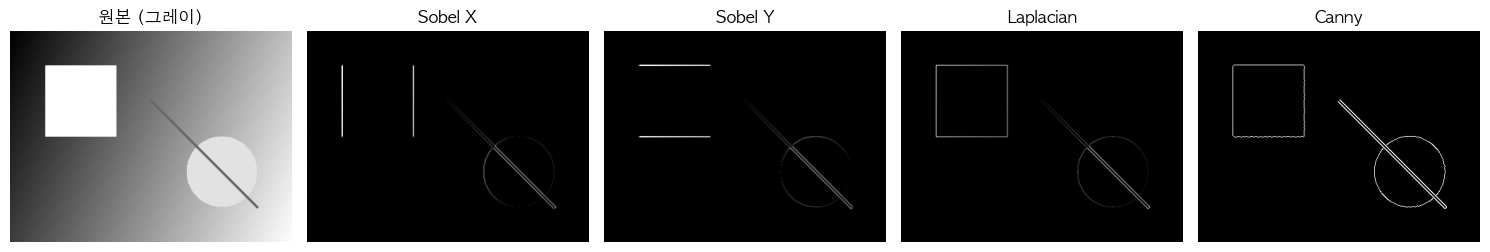

In [26]:
### 5.2 에지 검출 필터

def edge_detection_filters():
    """에지(경계선) 검출 필터들"""
    
    original = create_sample_image()
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)  # 그레이스케일로 변환
    
    # 다양한 에지 검출 방법
    edges = {
        '원본 (그레이)': gray,
        'Sobel X': cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3),
        # 수직 경계선 검출 (x방향 변화량)
        'Sobel Y': cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3),
        # 수평 경계선 검출 (y방향 변화량)
        'Laplacian': cv2.Laplacian(gray, cv2.CV_64F),
        # 모든 방향의 경계선 검출
        'Canny': cv2.Canny(gray, 50, 150)
        # 가장 정교한 경계선 검출 (하위임계값, 상위임계값)
    }
    
    plt.figure(figsize=(15, 6))
    
    for i, (name, edge_img) in enumerate(edges.items()):
        plt.subplot(1, 5, i+1)
        
        if name == 'Canny' or name == '원본 (그레이)':
            plt.imshow(edge_img, cmap='gray')
        else:
            plt.imshow(np.abs(edge_img), cmap='gray')  # 절댓값으로 표시
        
        plt.title(name)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 함수 실행
edge_detection_filters()


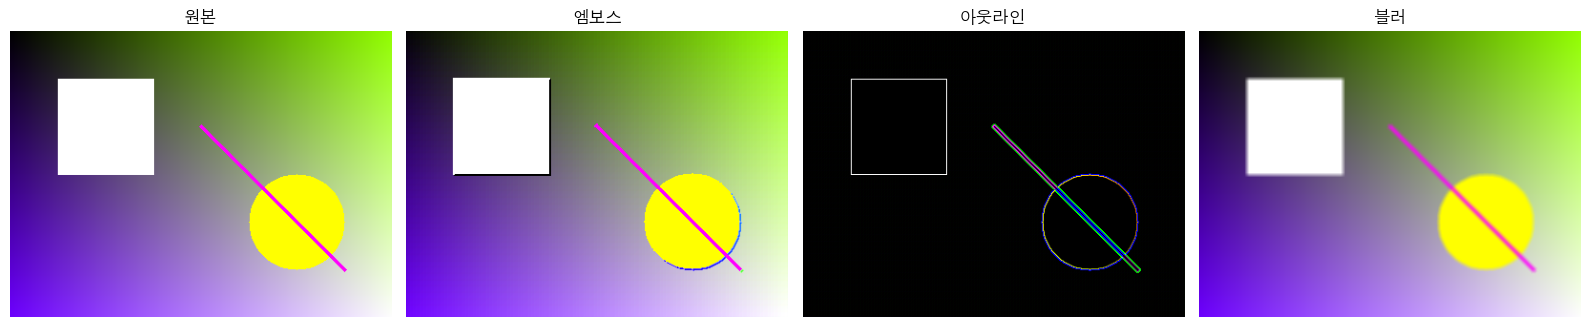

In [27]:
### 5.3 커스텀 커널


def custom_kernels():
    """커스텀 커널을 사용한 필터 예제"""
    
    original = create_sample_image()
    
    # 다양한 효과를 위한 커스텀 커널들
    kernels = {
        '원본': None,
        '엠보스': np.array([[-2, -1, 0],    # 입체감을 주는 효과
                            [-1,  1, 1],
                            [ 0,  1, 2]]),
        '아웃라인': np.array([[-1, -1, -1],  # 경계선 강조
                              [-1,  8, -1],
                              [-1, -1, -1]]),
        '블러': np.ones((5, 5), np.float32) / 25  # 평균 필터로 블러 효과
    }
    
    plt.figure(figsize=(16, 4))
    
    for i, (name, kernel) in enumerate(kernels.items()):
        plt.subplot(1, 4, i+1)
        
        if kernel is None:
            result = original
        else:
            result = cv2.filter2D(original, -1, kernel)  # 커스텀 커널 적용
        
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(name)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 함수 실행
custom_kernels()




원본 (BGR): 형태 (300, 400, 3), 데이터 타입 uint8
RGB: 형태 (300, 400, 3), 데이터 타입 uint8
그레이스케일: 형태 (300, 400), 데이터 타입 uint8
HSV: 형태 (300, 400, 3), 데이터 타입 uint8
LAB: 형태 (300, 400, 3), 데이터 타입 uint8
YUV: 형태 (300, 400, 3), 데이터 타입 uint8


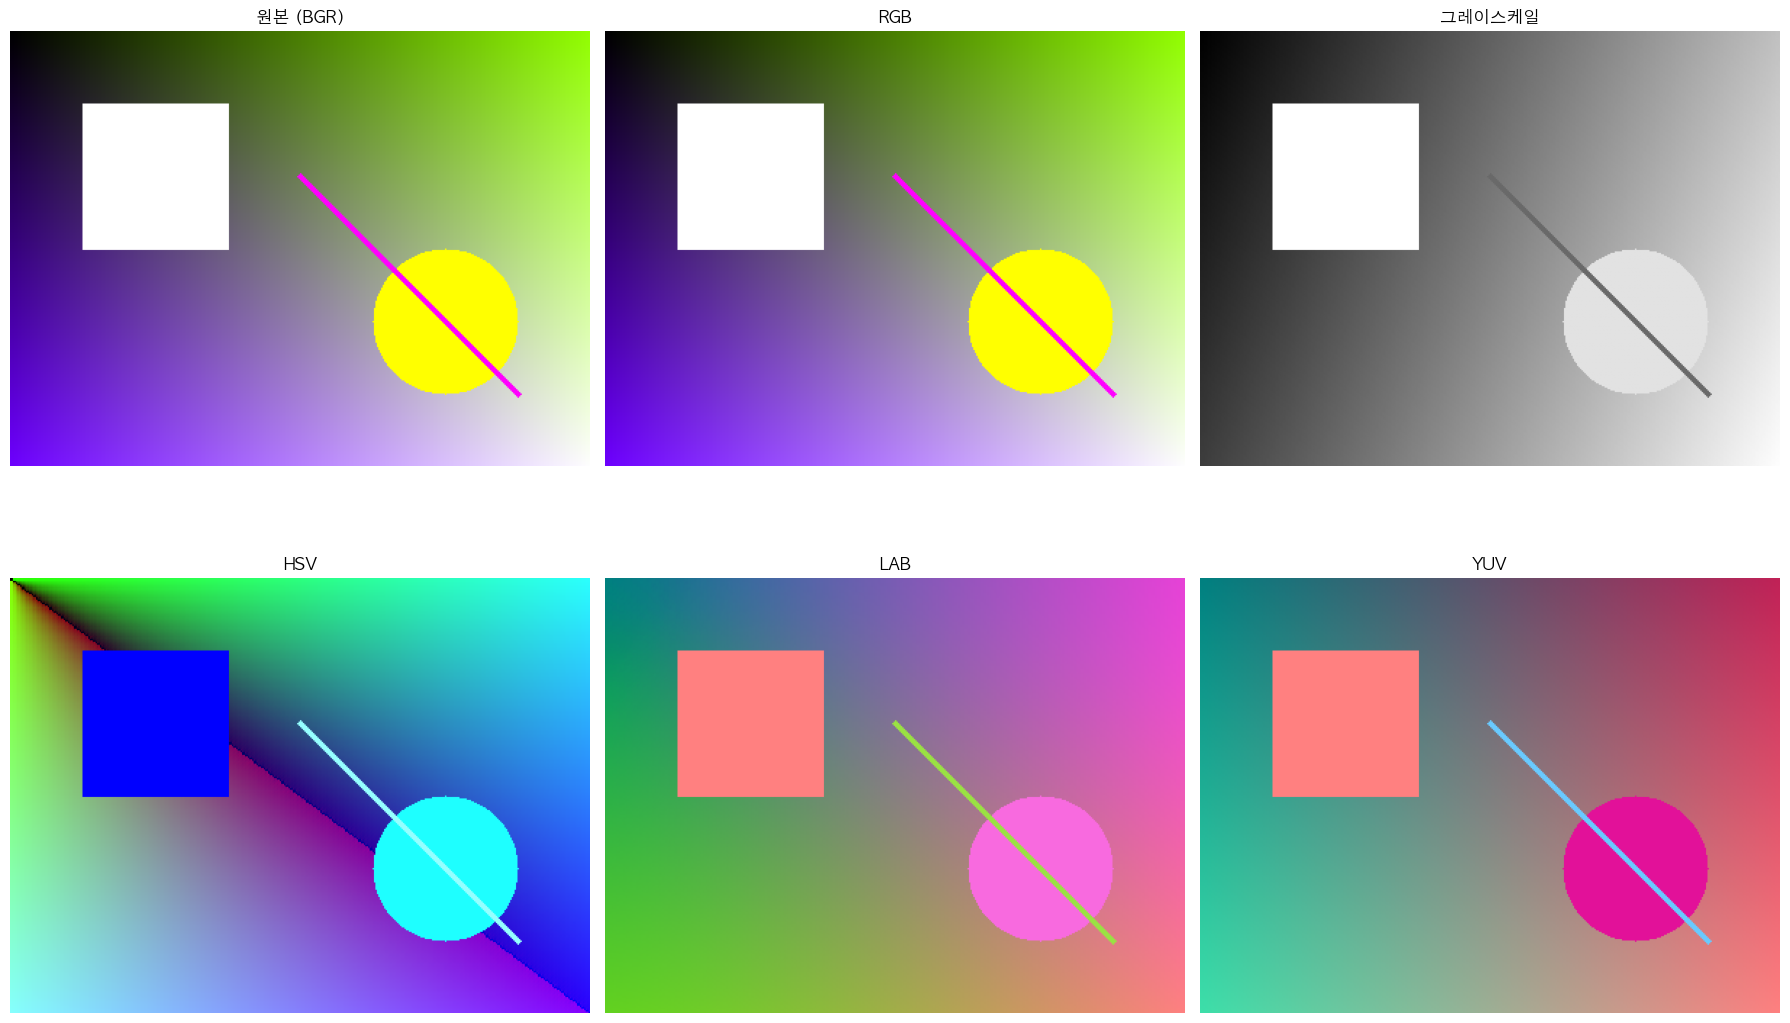

In [28]:
## 6. 색상 공간 변환

### 6.1 다양한 색상 공간

def demonstrate_format_conversion():
    """다양한 색상 공간 변환 시연"""
    
    original = create_sample_image()
    
    # 다양한 색상 공간 변환
    color_spaces = {
        '원본 (BGR)': original,
        'RGB': cv2.cvtColor(original, cv2.COLOR_BGR2RGB),
        '그레이스케일': cv2.cvtColor(original, cv2.COLOR_BGR2GRAY),
        'HSV': cv2.cvtColor(original, cv2.COLOR_BGR2HSV),      # 색상-채도-명도
        'LAB': cv2.cvtColor(original, cv2.COLOR_BGR2LAB),      # 지각적 색상 공간
        'YUV': cv2.cvtColor(original, cv2.COLOR_BGR2YUV)       # 밝기-색차 공간
    }
    
    plt.figure(figsize=(18, 12))
    
    for i, (name, img) in enumerate(color_spaces.items()):
        plt.subplot(2, 3, i+1)
        
        if len(img.shape) == 2:  # 그레이스케일
            plt.imshow(img, cmap='gray')
        elif name == '원본 (BGR)':
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img)
        
        plt.title(name)
        plt.axis('off')
        
        # 각 색상 공간의 특징 출력
        print(f"{name}: 형태 {img.shape}, 데이터 타입 {img.dtype}")
    
    plt.tight_layout()
    plt.show()

# 함수 실행
demonstrate_format_conversion()


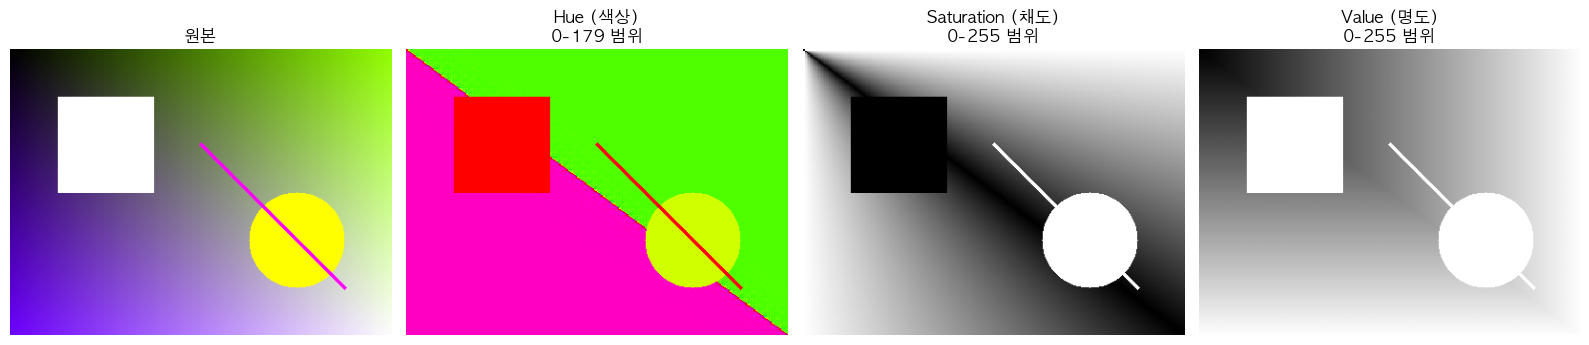

Hue 범위: 0 ~ 150
Saturation 범위: 0 ~ 255
Value 범위: 0 ~ 255


In [29]:
### 6.2 HSV 색상 공간 분석

def analyze_hsv_channels():
    """HSV 채널별 상세 분석"""
    
    original = create_sample_image()
    hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
    
    # HSV 채널 분리
    h, s, v = cv2.split(hsv)  # Hue(색상), Saturation(채도), Value(명도)
    
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('원본')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(h, cmap='hsv')
    plt.title('Hue (색상)\n0-179 범위')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(s, cmap='gray')
    plt.title('Saturation (채도)\n0-255 범위')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(v, cmap='gray')
    plt.title('Value (명도)\n0-255 범위')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 각 채널 통계 정보
    print(f"Hue 범위: {h.min()} ~ {h.max()}")
    print(f"Saturation 범위: {s.min()} ~ {s.max()}")
    print(f"Value 범위: {v.min()} ~ {v.max()}")

# 함수 실행
analyze_hsv_channels()


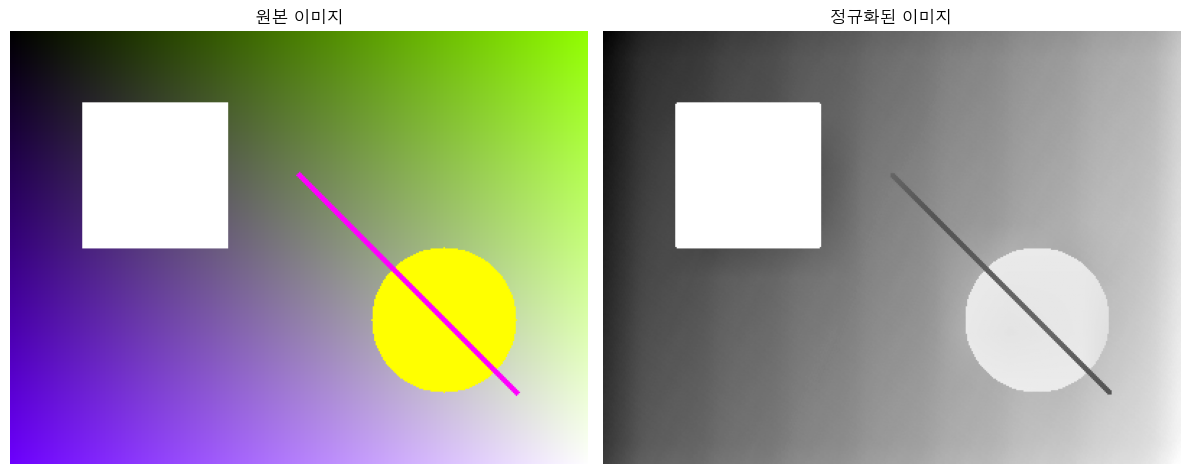

In [30]:
## 7. 이미지 정규화 (의료 영상 처리 예제)


def medical_image_normalization(image):
    """의료 영상 처리를 위한 정규화 파이프라인"""
    
    # 0단계: 컬러 이미지인 경우 그레이스케일로 변환
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
    
    # 1단계: 노이즈 제거 (중요한 의료 정보 보존을 위해 미디언 필터 사용)
    denoised = cv2.medianBlur(gray_image, 3)
    # 3x3 커널로 점 노이즈 제거 (X-ray의 센서 불량 등으로 생기는 노이즈)
    
    # 2단계: CLAHE로 대비 향상 (미세한 병변을 더 잘 보이게 함)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # clipLimit: 대비 증폭 제한 (과도한 증폭 방지)
    # tileGridSize: 이미지를 64개 구역으로 나누어 각각 처리
    enhanced = clahe.apply(denoised)
    
    # 3단계: Min-Max 정규화 (0-1 범위로 정규화)
    normalized = (enhanced - enhanced.min()) / (enhanced.max() - enhanced.min())
    
    return normalized

# 실습 예제
image = create_sample_image()
normalized = medical_image_normalization(image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized, cmap='gray')
plt.title('정규화된 이미지')
plt.axis('off')

plt.tight_layout()
plt.show()


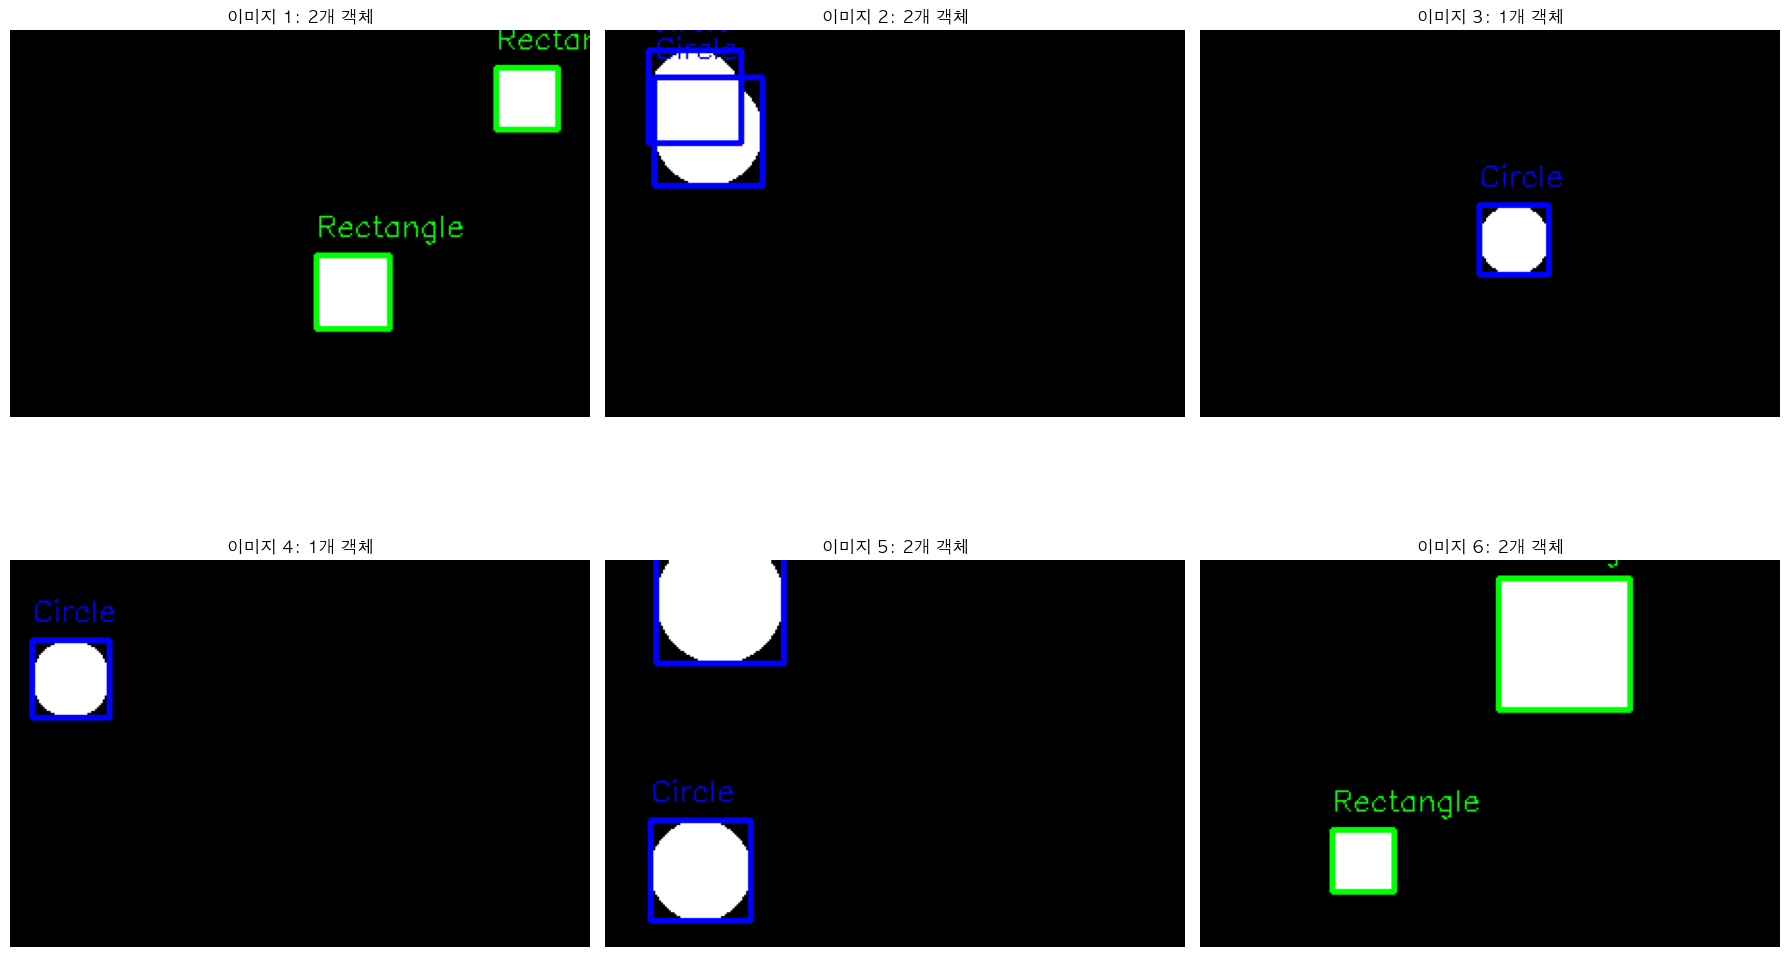

In [31]:
## 8. 객체 검출용 데이터 라벨링

### 8.1 바운딩 박스 라벨링

def create_detection_dataset():
    """객체 검출용 바운딩 박스 라벨링 예제"""
    
    def create_multi_object_image():
        """여러 객체가 있는 이미지 생성"""
        image = np.zeros((200, 300, 3), dtype=np.uint8)  # 빈 검은색 이미지
        bboxes = []      # 바운딩 박스 좌표들
        class_ids = []   # 각 객체의 클래스 ID
        
        # 랜덤하게 1-3개 객체 생성
        num_objects = np.random.randint(1, 4)
        
        for _ in range(num_objects):
            # 객체 타입 랜덤 선택
            obj_type = np.random.choice(['circle', 'rectangle'])
            
            # 랜덤 위치와 크기 설정
            x = np.random.randint(20, 280)
            y = np.random.randint(20, 180)
            size = np.random.randint(15, 35)
            
            if obj_type == 'circle':
                cv2.circle(image, (x, y), size, (255, 255, 255), -1)
                bbox = [x-size, y-size, x+size, y+size]  # [x_min, y_min, x_max, y_max]
                class_id = 0  # 원 클래스
            else:
                cv2.rectangle(image, (x-size, y-size), (x+size, y+size), (255, 255, 255), -1)
                bbox = [x-size, y-size, x+size, y+size]
                class_id = 1  # 사각형 클래스
            
            bboxes.append(bbox)
            class_ids.append(class_id)
        
        return image, bboxes, class_ids
    
    # 검출 데이터셋 생성
    detection_images = []
    detection_bboxes = []
    detection_classes = []
    
    for i in range(6):  # 6개 샘플 생성
        img, bboxes, class_ids = create_multi_object_image()
        detection_images.append(img)
        detection_bboxes.append(bboxes)
        detection_classes.append(class_ids)
    
    # 바운딩 박스 시각화
    plt.figure(figsize=(18, 12))
    
    for i in range(6):
        plt.subplot(2, 3, i+1)
        img_with_boxes = detection_images[i].copy()
        
        # 바운딩 박스 그리기
        for bbox, class_id in zip(detection_bboxes[i], detection_classes[i]):
            x_min, y_min, x_max, y_max = bbox
            
            # 클래스별 색상 설정
            color = (255, 0, 0) if class_id == 0 else (0, 255, 0)  # 빨강: 원, 초록: 사각형
            
            # 바운딩 박스 그리기
            cv2.rectangle(img_with_boxes, (x_min, y_min), (x_max, y_max), color, 2)
            
            # 클래스 라벨 텍스트 추가
            label = 'Circle' if class_id == 0 else 'Rectangle'
            cv2.putText(img_with_boxes, label, (x_min, y_min-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
            
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title(f'이미지 {i+1}: {len(detection_bboxes[i])}개 객체')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return detection_images, detection_bboxes, detection_classes

# 함수 실행
det_images, det_bboxes, det_classes = create_detection_dataset()


In [ ]:
## 9. 분류용 데이터셋 생성

### 9.1 라벨링된 데이터셋 생성

```python
def create_labeled_dataset():
    """분류용 라벨링된 데이터셋 생성"""
    
    def create_shape_image(shape_type, size=(100, 100)):
        """특정 도형 이미지 생성 함수"""
        image = np.zeros((size[0], size[1], 3), dtype=np.uint8)
        center = (size[1]//2, size[0]//2)  # 이미지 중심점
        
        if shape_type == 'circle':
            cv2.circle(image, center, 30, (255, 255, 255), -1)
            label = 0  # 원 클래스
        elif shape_type == 'rectangle':
            cv2.rectangle(image, (center[0]-25, center[1]-25), 
                         (center[0]+25, center[1]+25), (255, 255, 255), -1)
            label = 1  # 사각형 클래스
        elif shape_type == 'triangle':
            # 삼각형 꼭짓점 좌표 설정
            points = np.array([[center[0], center[1]-30],      # 상단 꼭짓점
                              [center[0]-26, center[1]+15],    # 좌하단 꼭짓점
                              [center[0]+26, center[1]+15]], np.int32)  # 우하단 꼭짓점
            cv2.fillPoly(image, [points], (255, 255, 255))
            label = 2  # 삼각형 클래스
        
        return image, label
    
    # 데이터셋과 라벨 저장할 리스트
    dataset = []
    labels = []
    class_names = ['원', '사각형', '삼각형']
    
    # 각 클래스별로 10개씩 이미지 생성 (총 30개)
    for shape_type in ['circle', 'rectangle', 'triangle']:
        for i in range(10):
            img, label = create_shape_image(shape_type)
            
            # 데이터 증강(Data Augmentation) 적용
            if i % 2 == 0:  # 짝수 번째는 노이즈 추가
                noise = np.random.normal(0, 20, img.shape).astype(np.int16)
                img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
                # np.clip으로 0-255 범위 유지
            
            if i % 3 == 0:  # 3의 배수는 회전 적용
                angle = np.random.uniform(-30, 30)  # -30도~30도 랜덤 회전
                M = cv2.getRotationMatrix2D((50, 50), angle, 1.0)
                img = cv2.warpAffine(img, M, (100, 100))
            
            dataset.append(img)
            labels.append(label)
    
    # numpy 배열로 변환
    dataset = np.array(dataset)
    labels = np.array(labels)
    
    print(f"데이터셋 크기: {dataset.shape}")
    print(f"라벨 크기: {labels.shape}")
    print(f"클래스별 개수: {np.bincount(labels)}")
    
    return dataset, labels, class_names

# 함수 실행
X, y, class_names = create_labeled_dataset()
```

### 9.2 데이터셋 시각화

```python
# 생성된 데이터셋 샘플 확인
plt.figure(figsize=(15, 10))

# 각 클래스별로 몇 개씩 샘플 보기
for class_id in range(3):
    # 해당 클래스의 인덱스들 찾기
    class_indices = np.where(y == class_id)[0]
    
    # 각 클래스에서 6개씩 샘플 표시
    for i in range(6):
        plt.subplot(3, 6, class_id * 6 + i + 1)
        sample_img = X[class_indices[i]]
        plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
        plt.title(f'{class_names[class_id]} #{i+1}')
        plt.axis('off')

plt.suptitle('생성된 데이터셋 샘플들', fontsize=16)
plt.tight_layout()
plt.show()
```

## 10. 데이터 분할 (Train/Validation/Test)

```python
def demonstrate_data_splitting():
    """데이터 분할 시연 함수"""
    
    # 앞서 생성한 데이터셋 사용
    X, y, class_names = create_labeled_dataset()
    
    print(f"전체 데이터: {len(X)}개")
    print(f"클래스별 분포: {Counter(y)}")
    
    # 1차 분할: 학습용(60%) + 임시(40%)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, 
        test_size=0.4,      # 40%를 임시 데이터로
        random_state=42,    # 재현가능한 결과를 위한 시드 설정
        stratify=y          # 각 클래스 비율 유지하며 분할
    )
    
    # 2차 분할: 임시(40%) → 검증용(20%) + 테스트용(20%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size=0.5,      # 임시 데이터의 50%씩 나누기
        random_state=42, 
        stratify=y_temp
    )
    
    # 분할 결과 출력
    print(f"\n=== 데이터 분할 결과 ===")
    print(f"학습 세트: {len(X_train)}개 ({len(X_train)/len(X)*100:.1f}%)")
    print(f"검증 세트: {len(X_val)}개 ({len(X_val)/len(X)*100:.1f}%)")
    print(f"테스트 세트: {len(X_test)}개 ({len(X_test)/len(X)*100:.1f}%)")
    
    # 각 세트별 클래스 분포 확인
    print(f"\n=== 클래스 분포 확인 ===")
    print(f"학습 세트: {Counter(y_train)}")
    print(f"검증 세트: {Counter(y_val)}")
    print(f"테스트 세트: {Counter(y_test)}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# 함수 실행
split_results = demonstrate_data_splitting()
X_train, X_val, X_test, y_train, y_val, y_test = split_results
```

### 10.1 데이터 분할 결과 시각화

```python
# 분할된 데이터 시각화
plt.figure(figsize=(15, 8))

sets_data = [
    ('전체', y, X),
    ('학습', y_train, X_train),
    ('검증', y_val, X_val),
    ('테스트', y_test, X_test)
]

for i, (set_name, labels, images) in enumerate(sets_data):
    # 상단: 클래스 분포 막대 그래프
    plt.subplot(2, 4, i+1)
    class_counts = [np.sum(labels == j) for j in range(3)]
    colors = ['red', 'green', 'blue']
    bars = plt.bar(range(3), class_counts, color=colors, alpha=0.7)
    plt.title(f'{set_name} 세트\n총 {len(labels)}개')
    plt.xlabel('클래스')
    plt.ylabel('개수')
    plt.xticks(range(3), class_names)
    
    # 막대 위에 개수 표시
    for bar, count in zip(bars, class_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                str(count), ha='center', va='bottom')
    
    # 하단: 샘플 이미지
    plt.subplot(2, 4, i+5)
    if len(images) > 0:
        # 각 클래스에서 하나씩 선택해서 표시
        sample_indices = []
        for class_id in range(3):
            class_indices = np.where(labels == class_id)[0]
            if len(class_indices) > 0:
                sample_indices.append(class_indices[0])
        
        if len(sample_indices) > 0:
            # 첫 번째 샘플 이미지 표시
            sample_img = images[sample_indices[0]]
            plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
            plt.title(f'{set_name} 샘플')
    plt.axis('off')

plt.tight_layout()
plt.show()
```

## 11. 요약 및 정리

```python
## 11. 요약 및 정리

### 11.1 추가 데이터 분할 함수

```python
# 추가로 제공된 데이터 분할 코드
def demonstrate_data_splitting_advanced():
    """고급 데이터 분할 시연 함수"""
    
    # 앞서 생성한 데이터셋 사용
    X, y, class_names = create_labeled_dataset()
    
    print(f"전체 데이터: {len(X)}개")
    print(f"클래스별 분포: {Counter(y)}")
    
    # 1차 분할: Train(60%) + Temp(40%)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, 
        test_size=0.4,      # 전체의 40%를 임시 데이터로
        random_state=42,    # 재현 가능한 결과를 위한 시드값
        stratify=y          # 클래스 비율을 유지하면서 분할
    )
    # train_test_split 매개변수 설명:
    # - 데이터: 입력 데이터 (X)
    # - 라벨: 정답 라벨 (y)
    # - test_size: 테스트 데이터 비율 (0.4 = 40%)
    # - random_state: 랜덤 시드 (동일한 결과 보장)
    # - stratify: 계층화 분할 (각 클래스 비율 유지)
    
    # 반환값 설명:
    # - X_train: 학습용 데이터 (60%)
    # - X_temp: 임시 데이터 (40%)
    # - y_train: 학습용 라벨 (60%)
    # - y_temp: 임시 라벨 (40%)

    # 2차 분할: Temp(40%) → Validation(20%) + Test(20%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size=0.5,      # 임시 데이터의 50%씩 나누기
        random_state=42, 
        stratify=y_temp
    )
    
    # 분할 결과 출력
    print(f"\n=== 데이터 분할 결과 ===")
    print(f"학습 세트: {len(X_train)}개 ({len(X_train)/len(X)*100:.1f}%)")
    print(f"검증 세트: {len(X_val)}개 ({len(X_val)/len(X)*100:.1f}%)")
    print(f"테스트 세트: {len(X_test)}개 ({len(X_test)/len(X)*100:.1f}%)")
    
    # 각 세트별 클래스 분포 확인
    print(f"\n=== 클래스 분포 ===")
    print(f"학습 세트: {Counter(y_train)}")
    print(f"검증 세트: {Counter(y_val)}")
    print(f"테스트 세트: {Counter(y_test)}")
    
    # 시각화
    plt.figure(figsize=(15, 8))
    
    sets_data = [
        ('전체', y, X),
        ('학습', y_train, X_train),
        ('검증', y_val, X_val),
        ('테스트', y_test, X_test)
    ]
    
    for i, (set_name, labels, images) in enumerate(sets_data):
        # 상단: 클래스 분포 막대 그래프
        plt.subplot(2, 4, i+1)
        
        # 각 클래스별 데이터 개수 계산
        class_counts = [np.sum(labels == j) for j in range(3)]
        colors = ['red', 'green', 'blue']
        bars = plt.bar(range(3), class_counts, color=colors, alpha=0.7)
        plt.title(f'{set_name} 세트\n총 {len(labels)}개')
        plt.xlabel('클래스')
        plt.ylabel('개수')
        plt.xticks(range(3), class_names)
        
        # 막대 위에 개수 표시
        for bar, count in zip(bars, class_counts):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    str(count), ha='center', va='bottom')
        
        # 하단: 샘플 이미지들
        plt.subplot(2, 4, i+5)
        if len(images) > 0:
            # 각 클래스에서 하나씩 선택해서 표시
            sample_indices = []
            for class_id in range(3):
                class_indices = np.where(labels == class_id)[0]
                # np.where() 설명:
                # - 조건에 맞는 요소들의 인덱스를 반환
                # - labels == class_id: 해당 클래스에 속하는 데이터 찾기
                # - [0]: 첫 번째 축(행)의 인덱스만 가져오기
                
                if len(class_indices) > 0:
                    sample_indices.append(class_indices[0])
            
            if len(sample_indices) > 0:
                # 첫 번째 샘플 이미지만 표시
                sample_img = images[sample_indices[0]]
                plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
                plt.title(f'{set_name} 샘플')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# 함수 실행
split_results = demonstrate_data_splitting_advanced()
X_train, X_val, X_test, y_train, y_val, y_test = split_results
```

## 12. 최종 정리 및 요약

```python
print("=== OpenCV 이미지 처리 튜토리얼 완료 ===")
print("\n✅ 배운 내용들:")
content_list = [
    "1. 기본 이미지 구조와 픽셀 이해 (RGB, BGR, 그레이스케일)",
    "2. 이미지 크기 조정 (다양한 보간법: NEAREST, LINEAR, CUBIC, LANCZOS)",
    "3. 이미지 회전 (기본 회전, 잘림 없는 회전)",
    "4. 다양한 필터링 기법:",
    "   - 블러 필터 (가우시안, 미디언, 바이래터럴)",
    "   - 샤프닝 필터",
    "   - 에지 검출 (Sobel, Laplacian, Canny)",
    "5. 색상 공간 변환 (BGR ↔ RGB, HSV, LAB, YUV)",
    "6. 이미지 정규화 및 향상 (의료 영상 처리 예제)",
    "7. 객체 검출용 바운딩 박스 라벨링",
    "8. 분류용 데이터셋 생성 및 데이터 증강",
    "9. 데이터 분할 (Train 60% / Validation 20% / Test 20%)"
]

for item in content_list:
    print(item)

print("\n🔧 주요 OpenCV 함수들:")
functions = [
    "cv2.resize() - 이미지 크기 조정",
    "cv2.getRotationMatrix2D() - 회전 변환 행렬 생성",
    "cv2.warpAffine() - 기하학적 변환 적용",
    "cv2.GaussianBlur() - 가우시안 블러 필터",
    "cv2.medianBlur() - 미디언 필터 (점 노이즈 제거)",
    "cv2.bilateralFilter() - 바이래터럴 필터 (경계선 보존)",
    "cv2.Canny() - 에지 검출",
    "cv2.cvtColor() - 색상 공간 변환",
    "cv2.createCLAHE() - 적응적 히스토그램 평활화",
    "cv2.rectangle() - 사각형 그리기",
    "cv2.circle() - 원 그리기",
    "cv2.putText() - 텍스트 추가"
]

for func in functions:
    print(f"- {func}")

print("\n📊 데이터 처리 핵심 개념:")
concepts = [
    "• 픽셀: 이미지의 최소 단위 (0-255 값을 가진 색상 정보)",
    "• 채널: BGR 각각이 하나의 채널 (총 3채널)",
    "• 보간법: 이미지 크기 변경 시 새로운 픽셀값 계산 방법",
    "• 커널: 필터링에 사용되는 작은 행렬",
    "• 바운딩 박스: 객체 위치를 나타내는 사각형 좌표",
    "• 데이터 증강: 원본 데이터에 변형을 가해 데이터양 증가",
    "• 계층화 분할: 각 클래스 비율을 유지하며 데이터 분할"
]

for concept in concepts:
    print(concept)

print("\n🎯 실무 활용 분야:")
applications = [
    "의료: X-ray, CT, MRI 이미지 분석",
    "보안: 얼굴 인식, 이상 행동 감지",
    "제조업: 불량품 검출, 품질 관리",
    "자동차: 자율주행, 차선 인식",
    "소매업: 바코드 스캔, 재고 관리",
    "농업: 작물 상태 모니터링",
    "엔터테인먼트: 사진 필터, AR 효과"
]

for app in applications:
    print(f"• {app}")

print(f"\n📈 처리한 데이터 통계:")
print(f"• 생성된 총 이미지: {len(X)}개")
print(f"• 학습 데이터: {len(X_train)}개")
print(f"• 검증 데이터: {len(X_val)}개") 
print(f"• 테스트 데이터: {len(X_test)}개")
print(f"• 클래스 수: {len(class_names)}개 ({', '.join(class_names)})")

print("\n🚀 다음 단계 학습 방향:")
next_steps = [
    "1. 딥러닝 모델 학습 (CNN, YOLO 등)",
    "2. 실시간 비디오 처리",
    "3. 고급 이미지 분할 기법",
    "4. 3D 컴퓨터 비전",
    "5. 실제 프로젝트 구현"
]

for step in next_steps:
    print(step)

print("\n✨ 수고하셨습니다! 이제 OpenCV의 기초를 탄탄히 익혔습니다!")
```
```